# 과제 001

주어진 함수를 이용하여 gradient descent 를 직접 구현하고 그래프를 그리시오.


**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```
def f(x):
    return x**4 - 3*x**3 +2

def fprime(x):
    h = 0.001
    return (f(x+h) - f(x))/h
```

* 힌트: 교과서 44p를 **참고**

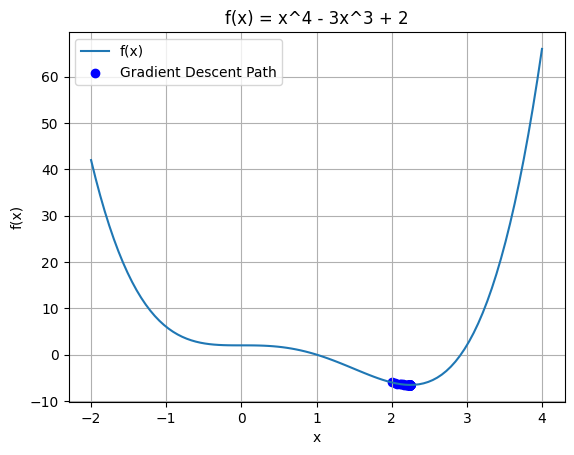

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 - 3*x**3 + 2

def fprime(x):
    h = 0.001
    return (f(x+h) - f(x))/h

def gradient_descent(learning_rate, num_iterations):
    x = 2  # 초기 x 값
    history = [x]  # 경로 기록을 위한 리스트

    for _ in range(num_iterations):
        gradient = fprime(x)  # 현재 위치에서의 기울기 계산
        x = x - learning_rate * gradient  # 경사하강법 업데이트
        history.append(x)  # 경로 기록

    return history

learning_rate = 0.01
num_iterations = 100

# Gradient Descent 수행
path = gradient_descent(learning_rate, num_iterations)

# x 값 범위 설정
x = np.linspace(-2, 4, 100)

# 함수 그래프 그리기
plt.plot(x, f(x), label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = x^4 - 3x^3 + 2')
plt.grid(True)

# 경로 그래프 그리기
plt.scatter(path, [f(x) for x in path], c='blue', label='Gradient Descent Path')
plt.legend()

# 그래프 출력
plt.show()


x_train.shape: (404, 13)
y_train.shape: (404,)
Epoch 001: Loss: 1646.721
Epoch 002: Loss: 454.365
Epoch 003: Loss: 178.301
Epoch 004: Loss: 122.493
Epoch 005: Loss: 116.867
Epoch 006: Loss: 105.959
Epoch 007: Loss: 103.941
Epoch 008: Loss: 101.271
Epoch 009: Loss: 99.436
Epoch 010: Loss: 98.482
Epoch 011: Loss: 97.506
Epoch 012: Loss: 96.876
Epoch 013: Loss: 96.255
Epoch 014: Loss: 95.685
Epoch 015: Loss: 95.167
Epoch 016: Loss: 94.650
Epoch 017: Loss: 94.234
Epoch 018: Loss: 93.838
Epoch 019: Loss: 93.389
Epoch 020: Loss: 92.937
Epoch 021: Loss: 92.451
Epoch 022: Loss: 91.911
Epoch 023: Loss: 91.589
Epoch 024: Loss: 91.250
Epoch 025: Loss: 91.066
Epoch 026: Loss: 90.928
Epoch 027: Loss: 90.802
Epoch 028: Loss: 90.726
Epoch 029: Loss: 90.689
Epoch 030: Loss: 90.688
Epoch 031: Loss: 90.659
Epoch 032: Loss: 90.617
Epoch 033: Loss: 90.595
Epoch 034: Loss: 90.580
Epoch 035: Loss: 90.577
Epoch 036: Loss: 90.573
Epoch 037: Loss: 90.574
Epoch 038: Loss: 90.555
Epoch 039: Loss: 90.568
Epoch 04

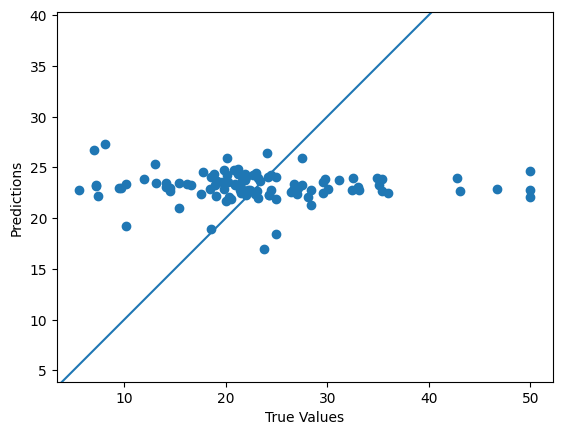

In [2]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

# 데이터셋 형태 확인
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)

# 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 손실 함수 및 최적화 알고리즘 설정
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

# 학습 루프
epochs = 100
batch_size = 32
num_batches = x_train.shape[0] // batch_size

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()

    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        x_batch = x_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]

        with tf.GradientTape() as tape:
            # 순전파
            y_pred = model(x_batch)
            loss_value = loss_fn(y_batch, y_pred)

        # 그래디언트 계산 및 역전파
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # 손실 값 누적
        epoch_loss_avg(loss_value)

    # 에포크별 손실 값 출력
    print('Epoch {:03d}: Loss: {:.3f}'.format(epoch + 1, epoch_loss_avg.result()))

# 테스트 데이터셋에 대한 예측
y_pred_test = model(x_test)

# 예측 결과 확인
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()